In [226]:
from numpy import *
from scipy import signal
from scipy.integrate import quad
import TMQGP as tm
import tqdm.notebook as tqdm
from QuarkTM import Particle, Channel
import QuarkTM
import pickle
import matplotlib

In [227]:
matplotlib.style.use('publication')

In [228]:
((47.5/16)**(1/3) ) * 0.155

0.22276976180911218

In [229]:
sqrt(940**2 + 300**2)

986.7117106835208

In [230]:
(47.5/16)**0.25 

1.3126332671432939

In [231]:
from syntax_sugar import pipe, END
from syntax_sugar import thread_syntax as t, process_syntax as p

NTHR = 14

# Import data

In [233]:
mode = 'XHI'

In [234]:
folder = f'./IntegrationE-7/SuppressG_{mode}_G=(14.50,15.50)L=0.200MQ=0.60MG=1.80screen=0.010/'

In [291]:
folder = "/home/const/Numerics/TMQGP/ipy/TMQGP/test/InspectIterations/IntegrationE-7/SuppressG_LO_G=(14.50,15.50)L=0.200MQ=0.60MG=1.80screen=0.010/"

In [292]:
trange = array([0.16, 0.2, 0.3, 0.4, 0.5])
# trange = array([0.16, 0.2])

In [293]:
lmax = 1

In [294]:
pQs = []
pGs = []

ch_names_Q = ['qa1', 'qa8', 'qq3', 'qq6', 'qg3', 'qg6', 'qg15']
ch_names_G = ['gg1', 'gq3', 'gq6', 'gq15', 'gg16', 'gg27']

TMs_Q = []
TMs_G = []
Xs_Q = []
Xs_G = []
# Sigmas = []
SQs = []
SGs = []


for T in trange:
    qrange = np.loadtxt(folder + 'qrange_T=%.3f.dat'%T)
    erange = np.loadtxt(folder + 'erange_T=%.3f.dat'%T)
    Gtab_Q = np.loadtxt(folder + 'Q_G_T=%.3f.dat'%T, dtype=complex)
    
    Gtab_Q = 1/(1/Gtab_Q - 0*5e-2j)
    
    pQ = QuarkTM.Particle(0.6, qrange, erange, 
                         Gtab=Gtab_Q)
    pQs += [pQ]

    Gtab_G = np.loadtxt(folder + 'G_G_T=%.3f.dat'%T, dtype=complex)
    
    Gtab_G = 1/(1/Gtab_G - 0*5e-2j)
    
    pG = QuarkTM.Particle(1.4, qrange, erange, 
                         Gtab=Gtab_G, stat='b', d=16)
    pGs += [pG]
    
    
    SQ = np.loadtxt(folder + 'Q_S_T=%.3f.dat'%T, dtype=complex)
    
    SQs += [SQ]

    SG = np.loadtxt(folder + 'G_S_T=%.3f.dat'%T, dtype=complex)
    
    SGs += [SG]

    tmss_Q = []
    smss_Q = []
    xmss_Q = []

    for l in range(lmax + 1):
        tms_Q = dict()
        sms_Q = dict()
        xms_Q = dict()
        for ch in ch_names_Q:
    #         print(ch)
            _tm = np.loadtxt(folder + f'Q_TM_{ch}_l=%i_T=%.3f.dat'%(l,T),
                           dtype=complex)
            
            _x = np.loadtxt(folder + f'Q_X_{ch}_l=%i_T=%.3f.dat'%(l,T),
                           dtype=complex)
            tms_Q[ch] = _tm
            
    #         sigma = np.loadtxt(folder + f'Q_ReS_{ch}_T=%.3f.dat'%T)
            # sigma = (1j*np.loadtxt(folder + f'Q_ImS_{ch}_T=%.3f.dat'%T)
            #         + np.loadtxt(folder + f'Q_ReS_{ch}_T=%.3f.dat'%T))
            
            # sms[ch] = sigma
            xms_Q[ch] = _x
        tmss_Q += [tms_Q]
        xmss_Q += [xms_Q]

    tmss_G = []
    smss_G = []
    xmss_G = []

    

    for l in range(lmax + 1):
        tms_G = dict()
        sms_G = dict()
        xms_G = dict()
        for ch in ch_names_G:
    #         print(ch)
            
            _tm = np.loadtxt(folder + f'G_TM_{ch}_l=%i_T=%.3f.dat'%(l,T),
                           dtype=complex)

            # print(folder + f'G_X_{ch}_l=%i_T=%.3f.dat'%(l,T))
            _x = np.loadtxt(folder + f'G_X_{ch}_l=%i_T=%.3f.dat'%(l,T),
                           dtype=complex)
            tms_G[ch] = _tm
            
    #         sigma = np.loadtxt(folder + f'Q_ReS_{ch}_T=%.3f.dat'%T)
            # sigma = (1j*np.loadtxt(folder + f'Q_ImS_{ch}_T=%.3f.dat'%T)
            #         + np.loadtxt(folder + f'Q_ReS_{ch}_T=%.3f.dat'%T))
            
            # sms[ch] = sigma
            xms_G[ch] = _x.copy()
            # if ch == 'gg1':
            #     plt.plot(erange, _x[:, 0])

        tmss_G += [tms_G]
        xmss_G += [xms_G]

        # print(tmss_G[0]['gg1'][:, 0])
        # plt.plot(erange, xmss_G[-1]['gg1'][:, 0], ls='--')

    

    # plt.plot(erange, xmss_G[0]['gg1'][:, 0], ls=':')
    # plt.plot(erange, xmss_G[1]['gg1'][:, 0], ls=':')
    
    # break
        
    Xs_Q += [xmss_Q]
    TMs_Q += [tmss_Q]
    Xs_G += [xmss_G]
    TMs_G += [tmss_G]
    # Sigmas += [sms]

## Plots of everything

In [295]:
irange = [0, 1]

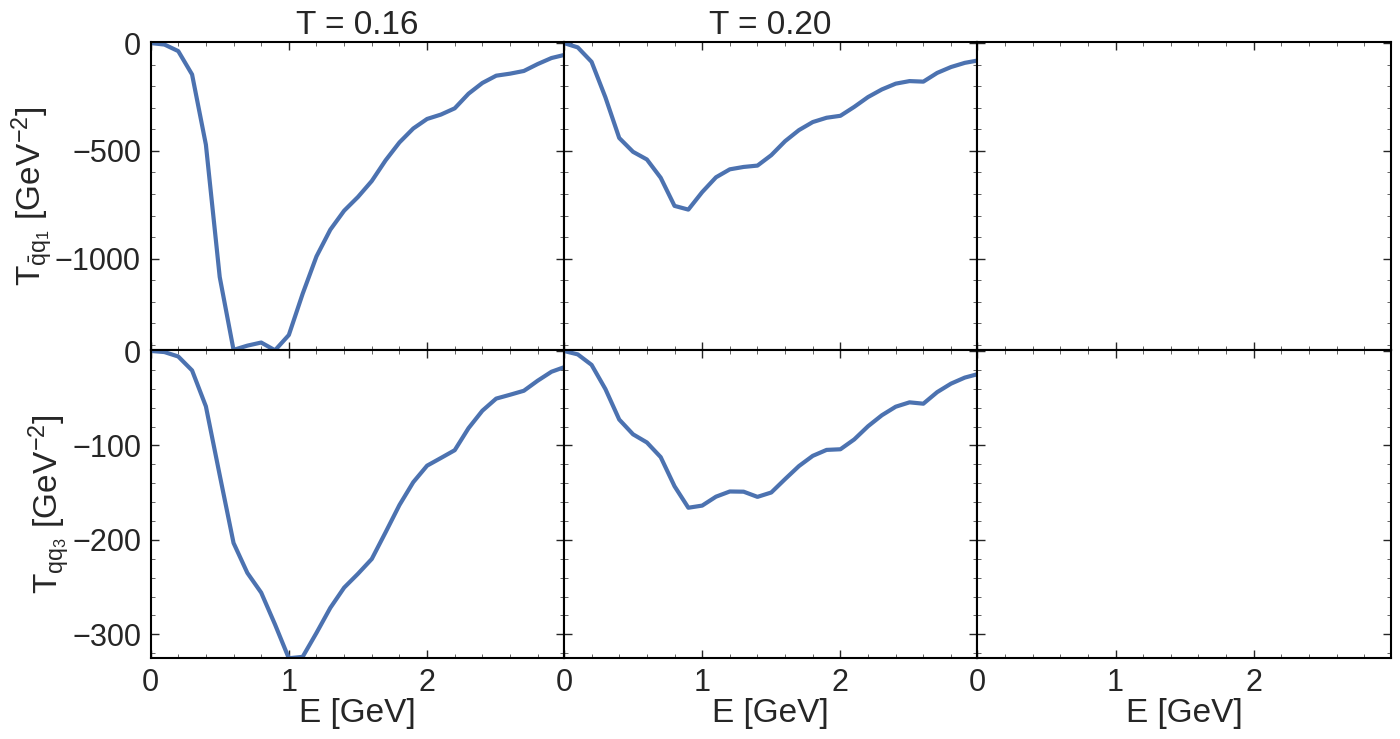

In [296]:
fig, ax = plt.subplots(2, 3, figsize=(16, 8), sharey='row', sharex='all')

for i, _i in zip(irange, range(5)):
    ax[0][_i].plot(erange, imag(TMs_Q[i][0]['qa1'][:, 0]))
    ax[1][_i].plot(erange, imag(TMs_Q[i][0]['qq3'][:, 0]))
    ax[0][_i].set_title('T = %.2f'%trange[i])
# for i in irange:

for _ in ax.flatten():
    _.set_xlim(0, 2.99)

for _ in ax[1]:
    _.set_xlabel(r'E [GeV]')

ax[0][0].set_ylabel(r'$T_{\bar q q_1}$ [GeV$^{-2}$]')
ax[1][0].set_ylabel(r'$T_{q q_3}$ [GeV$^{-2}$]')

plt.subplots_adjust(hspace=0, wspace=0)

plt.savefig(folder + 'T_Q_l0.pdf', bbox_inches='tight')

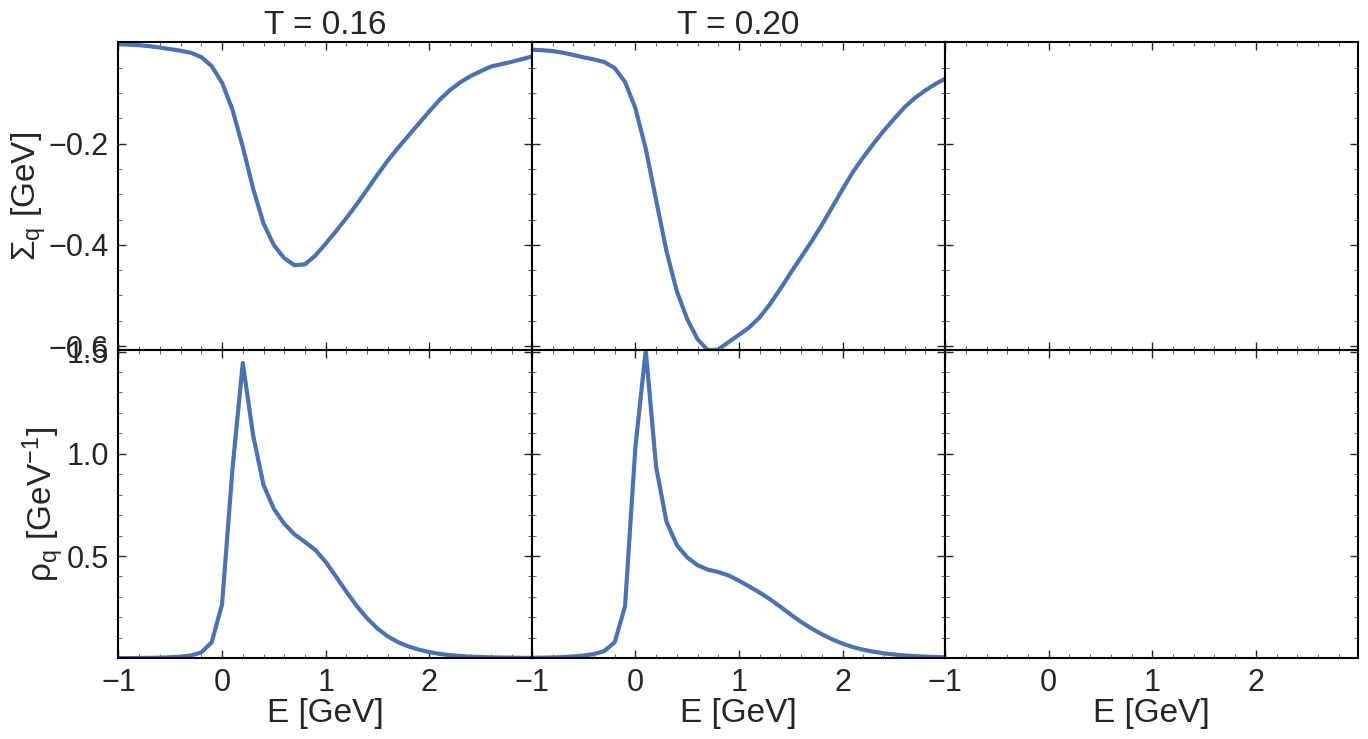

In [297]:
fig, ax = plt.subplots(2, 3, figsize=(16, 8), sharey='row', sharex='all')

for i, _i in zip(irange, range(5)):
    ax[0][_i].plot(erange, imag(SQs[i][:, 0]))
    ax[1][_i].plot(erange, (pQs[i].Rtab[:, 0]))
    ax[0][_i].set_title('T = %.2f'%trange[i])
# for i in irange:

for _ in ax.flatten():
    _.set_xlim(-1, 2.99)

for _ in ax[1]:
    _.set_xlabel(r'E [GeV]')

plt.subplots_adjust(hspace=0, wspace=0)
ax[0][0].set_ylabel(r'$\Sigma_{q}$ [GeV]')
ax[1][0].set_ylabel(r'$\rho_q$ [GeV$^{-1}$]')
plt.savefig(folder + 'S_Rho_Q.pdf', bbox_inches='tight')

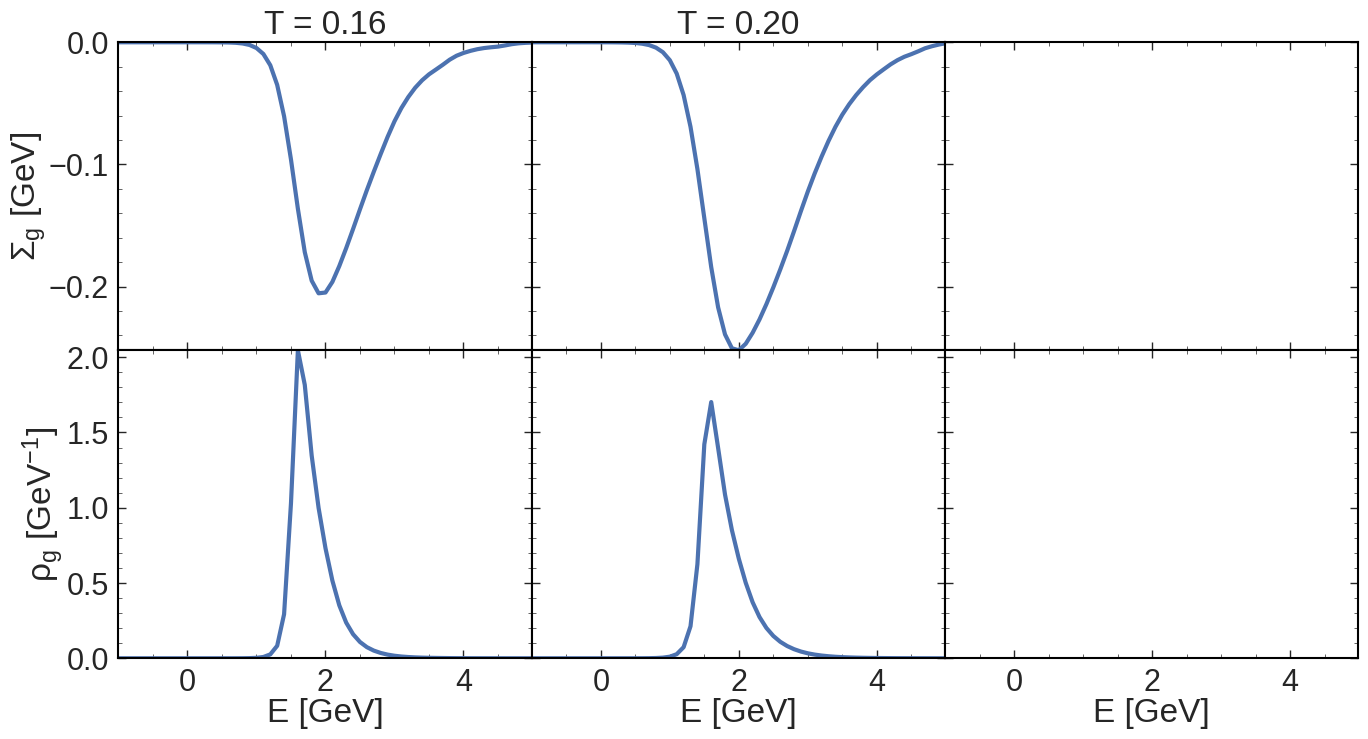

In [298]:
fig, ax = plt.subplots(2, 3, figsize=(16, 8), sharey='row', sharex='all')

for i, _i in zip(irange, range(5)):
    ax[0][_i].plot(erange, imag(SGs[i][:, 0]))
    ax[1][_i].plot(erange, (pGs[i].Rtab[:, 0]))
    ax[0][_i].set_title('T = %.2f'%trange[i])
# for i in irange:

for _ in ax.flatten():
    _.set_xlim(-1, 4.99)

for _ in ax[1]:
    _.set_xlabel(r'E [GeV]')

plt.subplots_adjust(hspace=0, wspace=0)
ax[0][0].set_ylabel(r'$\Sigma_{g}$ [GeV]')
ax[1][0].set_ylabel(r'$\rho_g$ [GeV$^{-1}$]')

plt.savefig(folder + 'S_Rho_G.pdf', bbox_inches='tight')

# Quasiparticle pressure

In [299]:
ps_Q = array([tm.OmQ_F(T, pt.iImG, pt.iReG) 
            for T, pt in zip(trange, pQs)])

In [300]:
ps_G = array([tm.OmQ_B(T, pt.iImG, pt.iReG) 
            for T, pt in zip(trange, pGs)])

In [301]:
from scipy.integrate import quad

Pfree_Q = array([quad(lambda z: z*z*T*log(1 + exp(-sqrt(0.6**2 + z**2)/T)) / 2/pi**2, 0, 5)[0] for T in trange])
Pfree_G = array([quad(lambda z: -z*z*T*log(1 - exp(-sqrt(1.8**2 + z**2)/T)) / 2/pi**2, 0, 5)[0] for T in trange])

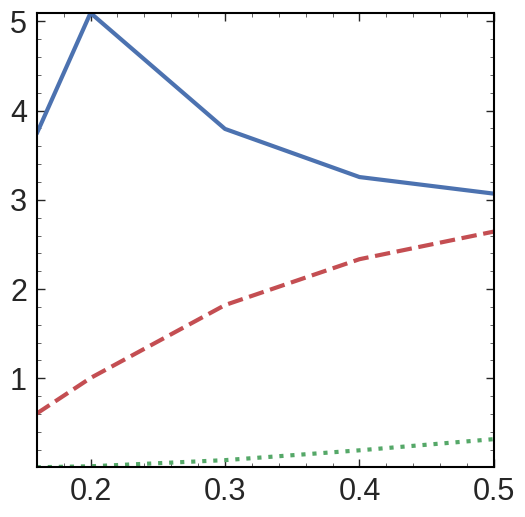

In [302]:
plt.plot(trange, 3*3*2*2*ps_Q/trange**4)
plt.plot(trange, 8*2*ps_G/trange**4, ls=':')

plt.plot(trange, 3*3*2*2*Pfree_Q/trange**4, ls='--')

# Self-energy pressure 

In [303]:
ps_S_Q = []
ps_S_G = []

# ps_S2 = []

for T, pt, sig_tot in zip(trange, pQs, SQs):
#     sigma = np.sum(list(sms.values()), axis=0) - 1e-3j
    sigma = sig_tot
#     plt.plot(erange, real(sigma[:, 0]))
    iReS = tm.Interpolator2D(qrange, erange, np.ascontiguousarray(real(sigma)))
    iImS = tm.Interpolator2D(qrange, erange, np.ascontiguousarray(imag(sigma)))
    
    iImG = tm.Interpolator2D(qrange, erange, np.ascontiguousarray(imag(pt.Gtab)))
    iReG = tm.Interpolator2D(qrange, erange, np.ascontiguousarray(real(pt.Gtab)))
    
#     break
#     print(T)
    ps_S_Q += [tm.OmS_F(T, iImG, iReG, iImS, iReS)]

for T, pt, sig_tot in zip(trange, pGs, SGs):
#     sigma = np.sum(list(sms.values()), axis=0) - 1e-3j
    sigma = sig_tot
#     plt.plot(erange, real(sigma[:, 0]))
    iReS = tm.Interpolator2D(qrange, erange, np.ascontiguousarray(real(sigma)))
    iImS = tm.Interpolator2D(qrange, erange, np.ascontiguousarray(imag(sigma)))
    
    iImG = tm.Interpolator2D(qrange, erange, np.ascontiguousarray(imag(pt.Gtab)))
    iReG = tm.Interpolator2D(qrange, erange, np.ascontiguousarray(real(pt.Gtab)))
    
#     break
#     print(T)
    ps_S_G += [tm.OmS_B(T, iImG, iReG, iImS, iReS)]
#     ps_S2 += [tm.OmS2_F(T, iImG, iReG, iImS, iReS)]
ps_S_Q = array(ps_S_Q)
ps_S_G = array(ps_S_G)

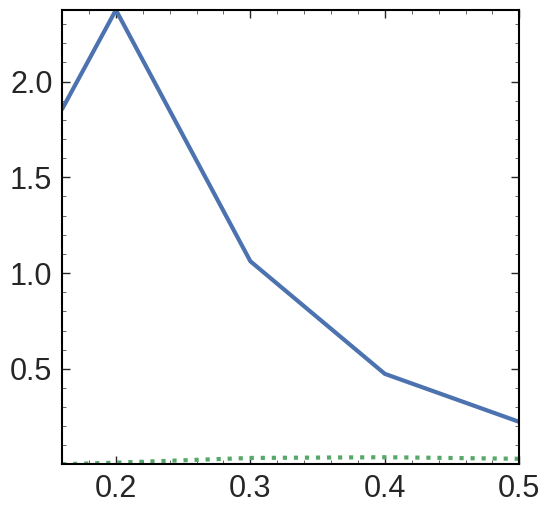

In [304]:
plt.plot(trange, 3*3*2*ps_S_Q/trange**4)
plt.plot(trange, 8*2*ps_S_G/trange**4, ls=':')

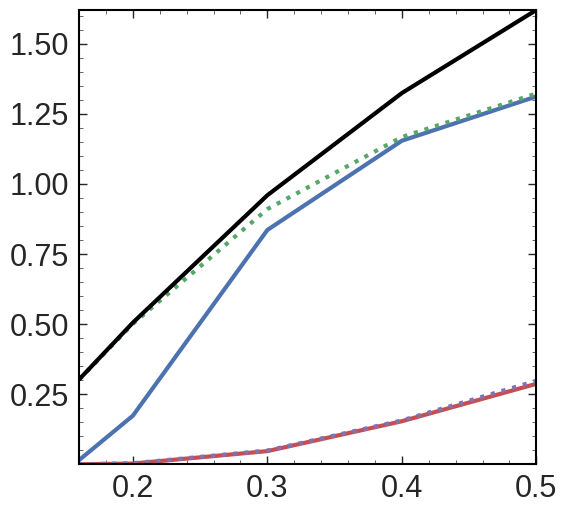

In [305]:
plt.plot(trange, 3*3*2*(ps_Q - ps_S_Q)/trange**4)
plt.plot(trange, 3*3*2*Pfree_Q/trange**4, ls=':')
plt.plot(trange, 8*2*(ps_G - ps_S_G)/trange**4)
plt.plot(trange, 8*2*Pfree_G/trange**4, ls=':')
plt.plot(trange, 8*2*Pfree_G/trange**4 + 3*3*2*Pfree_Q/trange**4, c='black')

# $\Phi$ pressure

In [306]:
NFS = {
    'qa1' : 3, 'qa8' : 3, 'qq3' : 3, 'qq6' : 3, 'qg3' : 1, 'qg6' : 1, 'qg15' : 1,
    'gq3' : 3, 'gq6' : 3, 'gq15' : 3, 'gg1' : 1, 'gg16' : 1, 'gg27' : 1
}

## Quarks

In [307]:
keys_QQ = ['qa1', 'qa8', 'qq3', 'qq6']

keys_QG = ['qg3', 'qg6', 'qg15']

In [308]:
lmax = 1

In [309]:
Phis_Q = []

LTs_QQ = dict()
LTs_QG = dict()
Vs = dict()

LSs_QQ = []
LSs_QG = []

for i, T in enumerate(trange[:]):

    xmss_Q = Xs_Q[i]
    LT_QQ = 0
    LT_QG = 0
    
    for k in keys_QQ:
        ds, da, Fa = np.loadtxt(folder + f'{k}_weights')
        print(k, ds, da, Fa, NFS[k])

        _lt = 0
        lts = []
        for l in range(lmax + 1):
            xms = xmss_Q[l]
            x = xms[k]
            v = np.loadtxt(folder + f'{k}_vq_l=%i_T=%.3f.dat'%(l, T))
            Vs[k] = v
            # print(k, ds, da, Fa, NFS[k])
            _lt = (2*l + 1) * sign(v[1])*4*pi*NFS[k]*ds * da / 6 * v**2 / x * log(1 - x)
            LT_QQ += _lt
            lts += [_lt]
        LTs_QQ[k] = lts

    for k in keys_QG:
        ds, da, Fa = np.loadtxt(folder + f'{k}_weights')
        _lt = 0
        lts = []
        for l in range(lmax + 1):
            xms = xmss_Q[l]
            x = xms[k]
            v = np.loadtxt(folder + f'{k}_vq_l=%i_T=%.3f.dat'%(l, T))
            Vs[k] = v
            # print(k, ds, da, Fa, NFS[k])
            _lt = (2*l + 1) * sign(v[1])*4*pi*NFS[k]*ds * da / 6 * v**2 / x * log(1 - x)
            LT_QG += _lt
            lts += [_lt]
        LTs_QG[k] = lts

    break
    # xms = Xs_Q[i]
    # tms = TMs_Q[i]

    
    # for k, x in xmss_Q[0].items():
    #     # x = xms[k]
    #     # if k == 'qq3':
    #     # print(NFS[k])
    #     ds, da, Fa = np.loadtxt(folder + f'{k}_weights')
    #     v = np.loadtxt(folder + f'{k}_vq_T=%.3f.dat'%T)
    #     Vs[k] = v
    #     print(k, ds, da, Fa, NFS[k])
    #     lt = sign(v[0])*4*pi*NFS[k]*ds * da / 6 * v**2 / x * log(1 - x)
    #     if k in keys_QQ:
    #         LT_QQ += lt
    #         LTs_QQ[k] = lt
    #     elif k in keys_QG:
    #         LT_QG += lt
    #         LTs_QG[k] = lt
    #     else:
    #         pass

    # break
    ImSTs = []
    ReSTs = []
    for LT, func, p2 in zip([LT_QQ, LT_QG], [tm.sigma_ff_onshell, tm.sigma_fb_onshell], [pQs[i], pGs[i]]):
        iImLT = tm.Interpolator2D(qrange, erange, ascontiguousarray(imag(LT)))
        #pipe(ch.erange) | p[lambda z: ch.func(z, q, ch.T, ch.iImT, ch.p_j.R)]*(NTHR//1) | END

        iEps1 = tm.Interpolator(qrange, pQs[i].om0(qrange), 'cubic')
        iEps2 = tm.Interpolator(qrange, p2.om0(qrange), 'cubic')
        
        ST = array([
            pipe(erange) | p[lambda z: func(z, q, trange[i], iImLT, p2.R, 
                                           iEps1, iEps2)] * NTHR | END
                    for q in tqdm.tqdm(qrange)])
    
        ST = ST.transpose()
    
        ReST = []
    
        for res in (ST.transpose()):
            iImSigma = tm.Interpolator(erange, np.ascontiguousarray(res), 'cubic')
            ReSigma = [tm.ReSigmaKK(e, iImSigma) for e in erange]
            ReST += [ReSigma]

        ReST = np.array(ReST).transpose()

        ImSTs += [ST]
        ReSTs += [ReST]

    iImST = tm.Interpolator2D(qrange, erange, ascontiguousarray(sum(ImSTs, axis=0)))
    iReST = tm.Interpolator2D(qrange, erange, ascontiguousarray(sum(ReSTs, axis=0)))

    LSs_QQ += [1j*ST + ReST]
    
    pt = pQs[i]

    Phi = 0.5 * tm.OmS_F(trange[i], pt.iImG, pt.iReG, iImST, iReST)
    Phis_Q += [Phi]

qa1 4.0 1.0 1.0 3
qa8 4.0 8.0 0.125 3
qq3 4.0 3.0 0.5 3
qq6 4.0 6.0 0.25 3


In [310]:
LT_QQ

array([[ 1.81898940e-12+1.36229204e-04j,  4.54747351e-13+4.60278045e-05j,
         1.13686838e-13+5.63711667e-06j, ...,
         4.33680869e-19+4.09081108e-11j,  2.16840434e-19+2.96478704e-11j,
        -2.16840434e-19+2.18398882e-11j],
       [-2.02378321e+02+2.73492638e-04j, -8.40007729e+01+8.94257839e-05j,
        -1.06766696e+01+1.08779867e-05j, ...,
        -7.86779986e-05+7.87121900e-11j, -5.70225278e-05+5.70458879e-11j,
        -4.20059808e-05+4.20222957e-11j],
       [-2.05688551e+02+5.31704788e-04j, -8.53600758e+01+1.77125145e-04j,
        -1.08491425e+01+2.16300818e-05j, ...,
        -7.99480954e-05+1.56774357e-10j, -5.79430400e-05+1.13620939e-10j,
        -4.26840810e-05+8.36979176e-11j],
       ...,
       [ 4.06467631e+02-2.41171552e+00j,  1.75036886e+02-1.15985801e+00j,
         2.23757203e+01-1.50638937e-01j, ...,
         1.65270588e-04-1.11963622e-06j,  1.19781594e-04-8.11474937e-07j,
         8.82380508e-05-5.97783681e-07j],
       [ 3.92116765e+02-1.43760915e+00j,  1.

In [313]:
v

array([0.00000000e+00, 1.72932654e+00, 6.10166864e-01, 2.64667263e-01,
       1.36412078e-01, 7.89705529e-02, 4.96038485e-02, 3.30914201e-02,
       2.31217123e-02, 1.67605956e-02, 1.25187861e-02, 9.58609162e-03,
       7.49633958e-03, 5.96859018e-03, 4.82681262e-03, 3.95698149e-03,
       3.28308140e-03, 2.75314632e-03, 2.33085405e-03, 1.99031081e-03,
       1.71272798e-03])

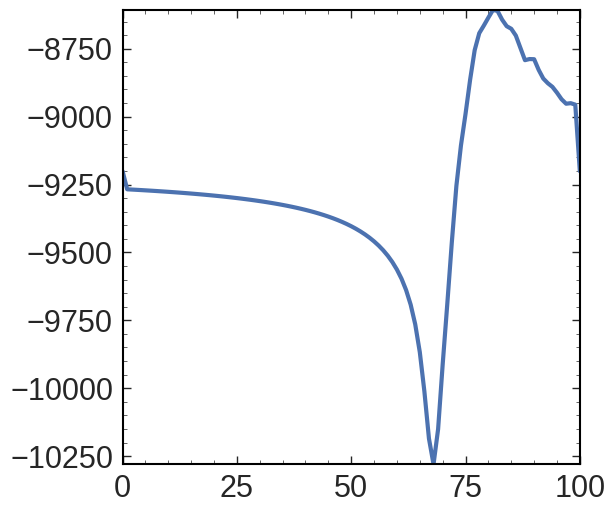

In [314]:
plt.plot(LT_QG[:, 0])

In [256]:
len(LSs_QQ)

5

In [257]:
LTs_QQ

{'qa1': [array([[-4.15025363e+02+8.75315101e-07j, -3.98095093e+02+8.39608075e-07j,
          -3.52660348e+02+7.43783287e-07j, ...,
          -2.14096920e-04+4.51544133e-13j, -2.01552345e-04+4.25086818e-13j,
          -1.89855983e-04+4.00418442e-13j],
         [-4.18144285e+02+1.08390747e-06j, -4.01086784e+02+1.03969126e-06j,
          -3.55310597e+02+9.21030903e-07j, ...,
          -2.15705862e-04+5.59149564e-13j, -2.03067014e-04+5.26387326e-13j,
          -1.91282754e-04+4.95840341e-13j],
         [-4.18156053e+02+1.32211316e-06j, -4.01098071e+02+1.26817975e-06j,
          -3.55320596e+02+1.12344192e-06j, ...,
          -2.15711933e-04+6.82031466e-13j, -2.03072729e-04+6.42069212e-13j,
          -1.91288137e-04+6.04809048e-13j],
         ...,
         [-4.06954227e+02-6.95106726e-01j, -3.90353205e+02-6.66751002e-01j,
          -3.45802046e+02-5.90654457e-01j, ...,
          -2.09933307e-04-3.58581000e-07j, -1.97632689e-04-3.37570672e-07j,
          -1.86163791e-04-3.17980978e-07j],
   

In [258]:
keys_GG = ['gg1', 'gg16', 'gg27']
keys_GQ = ['gq3', 'gq6', 'gq15']

In [259]:
Phis_G = []

LTs_GG = dict()
LTs_GQ = dict()
Vs = dict()

LSs_GG = []
LSs_GQ = []

for i, T in enumerate(trange[:]):
    LT_GG = 0
    LT_GQ = 0
    xmss_G = Xs_G[i]

    for k in keys_GG:
        ds, da, Fa = np.loadtxt(folder + f'{k}_weights')
        _lt = 0
        lts = []
        for l in range(lmax + 1):
            # print(l)
            xms = xmss_G[l]
            x = xms[k]
            # plt.plot(erange, x[:, 0])
            v = np.loadtxt(folder + f'{k}_vq_l=%i_T=%.3f.dat'%(l, T))
            Vs[k] = v
            # print(k, ds, da, Fa, NFS[k])
            _lt = (2*l + 1) * sign(v[1])*4*pi*NFS[k]*ds * da / 16 * v**2 / x * log(1 - x)
            LT_GG += _lt
            lts += [_lt]
        LTs_GG[k] = lts
    #     break
    # break
    for k in keys_GQ:
        ds, da, Fa = np.loadtxt(folder + f'{k}_weights')
        _lt = 0
        lts = []
        for l in range(lmax + 1):
            xms = xmss_G[l]
            x = xms[k]
            v = np.loadtxt(folder + f'{k}_vq_l=%i_T=%.3f.dat'%(l, T))
            Vs[k] = v
            # print(k, ds, da, Fa, NFS[k])
            _lt = (2*l + 1) * sign(v[1])*4*pi*NFS[k]*ds * da / 16 * v**2 / x * log(1 - x)
            LT_GQ += _lt
            lts += [_lt]
        LTs_GQ[k] = lts

    # break
    # xms = Xs_G[i]
    # tms = TMs_G[i]
    
    # for k, x in xms.items():
    #     # x = xms[k]
    #     # if k == 'qq3':
    #     # print(NFS[k])
    #     ds, da, Fa = np.loadtxt(folder + f'{k}_weights')

    #     #### adding the p-wave

    #     lt = 0

    #     for l in range(lmax + 1):
    #         v = np.loadtxt(folder + f'{k}_vq_l=%i_T=%.3f.dat'%(l, T))
    #         Vs[k] = v
    #         print(k, ds, da, Fa)
    #         lt += sign(v[0])*4*pi*NFS[k]*ds * da / 6 * v**2 / x * log(1 - x)
            
    #     if k in keys_GG:
    #         LT_GG += lt
    #         LTs_GG[k] = lt 
    #     elif k in keys_GQ:
    #         LT_GQ += lt
    #         LTs_GQ[k] = lt 
    #     else:
    #         pass

    # break
    ImSTs = []
    ReSTs = []
    for LT, func, p2 in zip([LT_GG, LT_GQ], [tm.sigma_bb_onshell, tm.sigma_bf_onshell], [pGs[i], pQs[i]]):
        iImLT = tm.Interpolator2D(qrange, erange, ascontiguousarray(imag(LT)))
        #pipe(ch.erange) | p[lambda z: ch.func(z, q, ch.T, ch.iImT, ch.p_j.R)]*(NTHR//1) | END

        iEps1 = tm.Interpolator(qrange, pGs[i].om0(qrange), 'cubic')
        iEps2 = tm.Interpolator(qrange, p2.om0(qrange), 'cubic')
        
        ST = array([
            pipe(erange) | p[lambda z: func(z, q, trange[i], iImLT, p2.R, iEps1, iEps2)] * NTHR | END
                    for q in tqdm.tqdm(qrange)])
    
        ST = ST.transpose()
    
        ReST = []
    
        for res in (ST.transpose()):
            iImSigma = tm.Interpolator(erange, np.ascontiguousarray(res), 'cubic')
            ReSigma = [tm.ReSigmaKK(e, iImSigma) for e in erange]
            ReST += [ReSigma]

        ReST = np.array(ReST).transpose()

        ImSTs += [ST]
        ReSTs += [ReST]

    iImST = tm.Interpolator2D(qrange, erange, ascontiguousarray(sum(ImSTs, axis=0)))
    iReST = tm.Interpolator2D(qrange, erange, ascontiguousarray(sum(ReSTs, axis=0)))

    LSs_GG += [1j*ST + ReST]
    
    pt = pGs[i]

    Phi = 0.5 * tm.OmS_B(trange[i], pt.iImG, pt.iReG, iImST, iReST)
    Phis_G += [Phi]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

In [260]:
matplotlib.style.use('publication')

In [261]:
Phis_G

[1.0092551449495516e-08,
 1.2793800041887613e-07,
 2.1542274468869747e-06,
 7.8518591314231e-06,
 1.5958110092350745e-05]

In [262]:
Phis_Q

[1.8024235011720905e-05,
 5.194354110815225e-05,
 0.00011362281333529391,
 0.00016390292690594688,
 0.00019182732338008447]

In [263]:
Phis_Q

[1.8024235011720905e-05,
 5.194354110815225e-05,
 0.00011362281333529391,
 0.00016390292690594688,
 0.00019182732338008447]

In [264]:
Phis_Q

[1.8024235011720905e-05,
 5.194354110815225e-05,
 0.00011362281333529391,
 0.00016390292690594688,
 0.00019182732338008447]

In [265]:
i = 0

In [266]:
Phis_Q = array(Phis_Q)

In [267]:
Phis_G = array(Phis_G)

In [268]:
Phis_Q

array([1.80242350e-05, 5.19435411e-05, 1.13622813e-04, 1.63902927e-04,
       1.91827323e-04])

In [269]:
import matplotlib
matplotlib.style.use('publication')

In [270]:
import pandas as pd

In [271]:
lat = pd.read_csv('/home/const/MEGA/Physics/GrabbedFigures/LiuRapp2018/PT.csv')

Get the contributions to pressure

In [272]:
Nc = 3
Nf = 3
Ns = 2
Na = 2

In [273]:
P_QP_G = (Nc**2 - 1) * Ns * (ps_G - ps_S_G)
P_QP_Q = Nc * Nf * Ns * Na * (ps_Q - ps_S_Q)

P_Q_G = (Nc**2 - 1) * Ns * (ps_G)
P_Q_Q = Nc * Nf * Ns * Na * (ps_Q)

P_S_G = (Nc**2 - 1) * Ns * (- ps_S_G)
P_S_Q = Nc * Nf * Ns * Na * (- ps_S_Q)

P_Phi_Q = Nc * Nf * Ns * Na * Phis_Q 
P_Phi_G = (Nc**2 - 1) * Ns * Phis_G 

P_Phi = P_Phi_G + P_Phi_Q

P_tot = P_QP_G + P_QP_Q + P_Phi

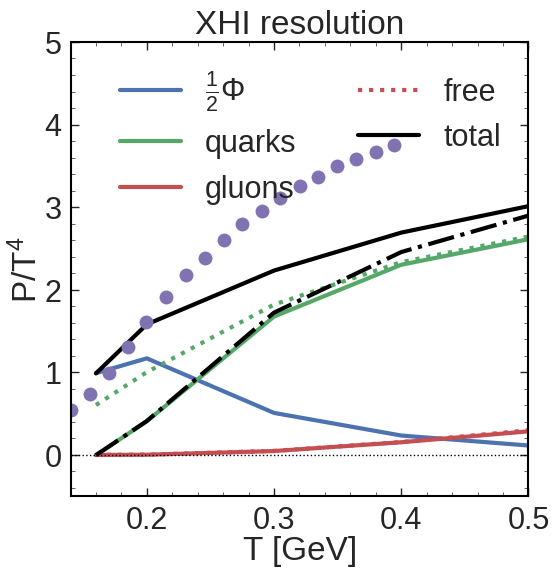

In [274]:
lp, = plt.plot(trange, P_Phi/trange**4, label=r'$\frac{1}{ 2 }\Phi$')
# plt.plot(trange, P_phi_tot_1, label=r'$\frac{1}{ 2 }\Phi$ L=1', c=lp.get_c(), ls='--')

# plt.plot(trange, 8*2*Phis_G/trange**4 / 2)
lQ, = plt.plot(trange, P_QP_Q/trange**4, label='quarks')
plt.plot(trange, 3*3*2*2*Pfree_Q/trange**4, ls=':', c=lQ.get_c())
lG, = plt.plot(trange, P_QP_G/trange**4, label='gluons')
plt.plot(trange, 8*2*Pfree_G/trange**4, ls=':', c=lG.get_c(), label='free')

plt.plot(trange, (P_QP_Q + P_QP_G)/trange**4, ls='-.', c='black')
plt.plot(trange, P_tot/trange**4, c='black', label='total')
# plt.plot(trange, )

plt.title(mode + ' resolution')
plt.ylim(-0.5, 5)
plt.legend(ncol=2)

plt.plot(lat.x, lat.PT_lat, ls='none', marker='o')

plt.axhline(0, lw=1, ls=':', c='black')

plt.savefig(folder + 'PT_swave_'+mode+'.pdf', bbox_inches='tight')

plt.xlabel('T [GeV]')
plt.ylabel(r'P/T$^4$')

df_P = pd.DataFrame(array([trange, P_tot, P_Q_Q, P_Q_G, P_S_Q, P_S_G, P_Phi, P_Phi_Q, P_Phi_G]).transpose(), 
               columns=['T', 'Ptot', 'P_Q_Q', 'P_Q_G', 'P_S_Q', 'P_S_G', 'P_Phi', 'P_Phi_Q', 'P_Phi_G'])

df_P.to_csv(folder + 'pressure.csv')

In [275]:
df_P

,T,Ptot,P_Q_Q,P_Q_G,P_S_Q,P_S_G,P_Phi,P_Phi_Q,P_Phi_G
0,0.16,0.000647,0.002820,0.000002,-0.002822,-0.000001,0.000649,0.000649,1.614808e-07
1,0.20,0.002530,0.008499,0.000022,-0.007846,-0.000017,0.001872,0.001870,2.047008e-06
2,0.30,0.018084,0.030261,0.000658,-0.016687,-0.000272,0.004125,0.004090,3.446764e-05
3,0.40,0.068918,0.082732,0.004904,-0.023782,-0.000962,0.006026,0.005901,1.256297e-04
4,0.50,0.188284,0.190885,0.019787,-0.027637,-0.001912,0.007161,0.006906,2.553298e-04


## Plotting the integrands

LogSigma plots

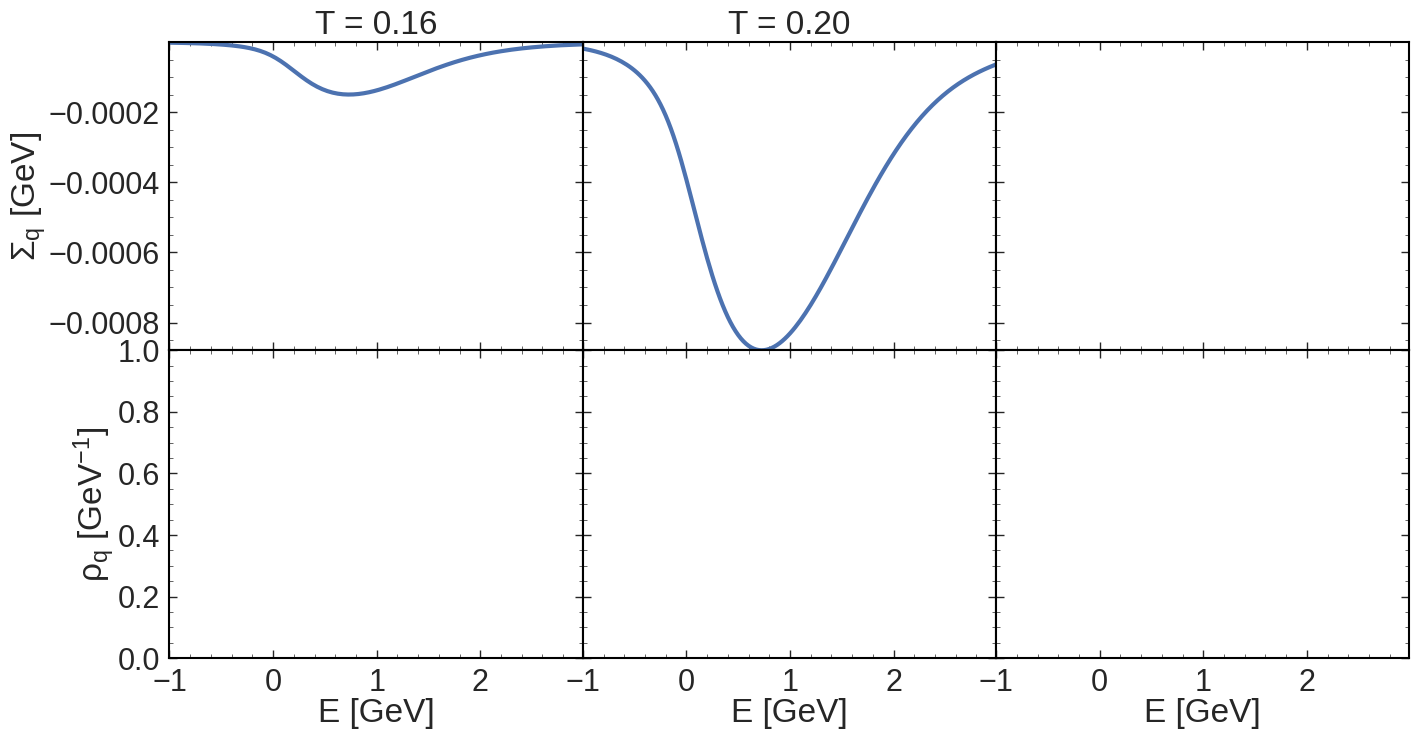

In [276]:
fig, ax = plt.subplots(2, 3, figsize=(16, 8), sharey='row', sharex='all')

for i, _i in zip(irange, range(5)):
    ax[0][_i].plot(erange, imag(LSs_QQ[i][:, 0]))
    # ax[1][_i].plot(erange, (pQs[i].Rtab[:, 0]))
    ax[0][_i].set_title('T = %.2f'%trange[i])
# for i in irange:

for _ in ax.flatten():
    _.set_xlim(-1, 2.99)

for _ in ax[1]:
    _.set_xlabel(r'E [GeV]')

plt.subplots_adjust(hspace=0, wspace=0)
ax[0][0].set_ylabel(r'$\Sigma_{q}$ [GeV]')
ax[1][0].set_ylabel(r'$\rho_q$ [GeV$^{-1}$]')
plt.savefig(folder + 'LogS_Rho_Q.pdf', bbox_inches='tight')